In [2]:
# libraries 
import os  
import numpy as np 
import seaborn as sns 
import cv2  
import matplotlib.pyplot as plt 
import time 
from tqdm import tqdm  

In [4]:
labels = ['glioma','meningioma','notumor','pituitary']     

X_train = []
y_train = []
image_size = 299

for i in labels:
    folderPath = os.path.join('./DataSet','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('./DataSet','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 300/300 [00:00<00:00, 610.93it/s]


In [5]:
print(X_train.shape) 
print(y_train.shape)

(6795, 299, 299, 3)
(6795,)


In [6]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.2,random_state=101)

In [8]:
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(5436, 299, 299, 3)
(1359, 299, 299, 3)
(5436,)
(1359,)


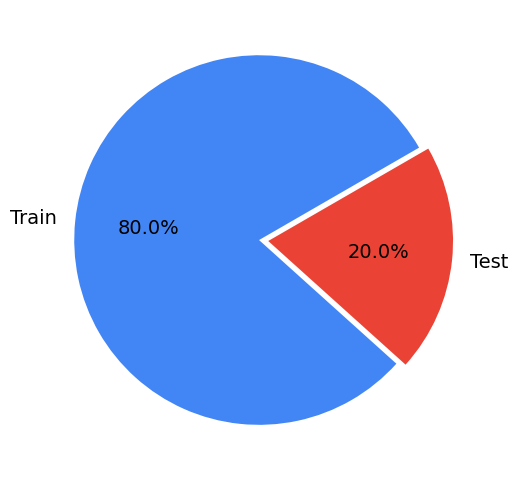

In [8]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len(y_train), len(y_test)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=30);

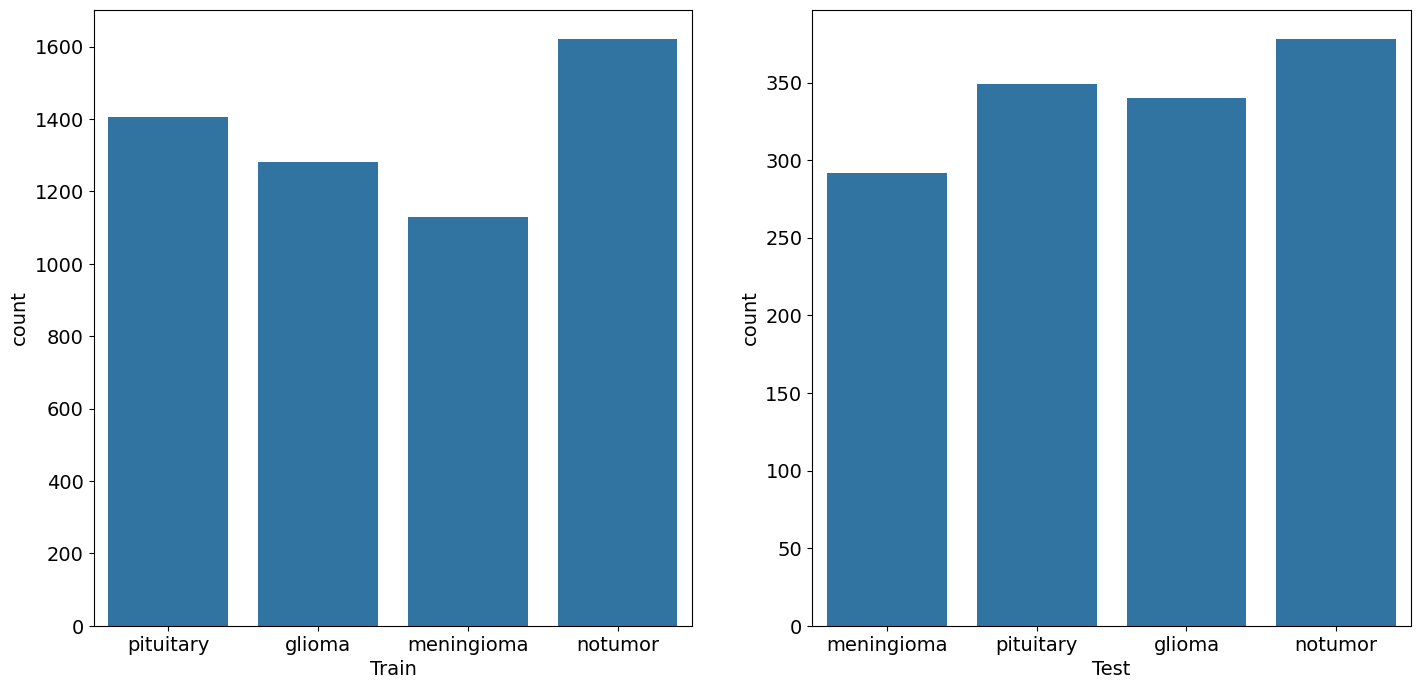

In [9]:
# Before augmentation
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([y_train, y_test]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

## ----------------------------------

In [9]:
# convert into 2-D array
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

In [10]:
print(X_train_reshaped.shape) 
print(X_test_reshaped.shape)

(5436, 268203)
(1359, 268203)


In [11]:
X_train_normalized = X_train_reshaped / 255.0
X_test_normalized = X_test_reshaped / 255.0

In [12]:
# Checking before using
print(f"Maximum and Minimum pixel value: {X_train_normalized.max()} - {X_train_normalized.min()}")  
print(f"Maximum and Minimum pixel value: {X_test_normalized.max()} - {X_test_normalized.min()}") 

Maximum and Minimum pixel value: 1.0 - 0.0
Maximum and Minimum pixel value: 1.0 - 0.0


In [13]:
print("x_train shape",X_train_normalized.shape)
print("x_test shape",X_test_normalized.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (5436, 268203)
x_test shape (1359, 268203)
y_train shape (5436,)
y_test shape (1359,)


In [14]:
#ML classifiers
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

# Performance metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Define class labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the confusion matrix data
confusion_matrix = np.array([[185 , 0, 0,  0],
                              [ 1, 170, 0, 0],
                              [ 1, 1, 95, 0],
                              [  0, 1, 0, 198]])

# Plot confusion matrix
plt.figure(figsize=(14, 12), dpi=500)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=labels, yticklabels=labels, annot_kws={"size": 30})

# Increase label font size
plt.xticks(fontsize=25)
plt.yticks(fontsize=25) 
plt.xlabel('Predicted', fontsize = 25)
plt.ylabel('Actual', fontsize = 25)
plt.show()

## --------------------------------------------------

In [15]:
starting_time = time.time()  
# Train SVM classifier
svm_classifier = SVC(kernel='linear') 
svm_classifier.fit(X_train_normalized, y_train)

# Evaluate SVM classifier
accuracy_Linear = svm_classifier.score(X_test_normalized, y_test)
print("Accuracy of Linear:", accuracy_Linear)   

ending_time = time.time()  
  
total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of Linear: 0.8888888888888888
Total runtime of model: 33.85464739004771 Min.


In [16]:
# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test_normalized)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report for SVM_Linear:")
print(report)

Classification Report for SVM_Linear:
              precision    recall  f1-score   support

      glioma       0.82      0.85      0.84       340
  meningioma       0.78      0.74      0.76       292
     notumor       0.98      0.95      0.96       378
   pituitary       0.95      0.98      0.96       349

    accuracy                           0.89      1359
   macro avg       0.88      0.88      0.88      1359
weighted avg       0.89      0.89      0.89      1359



In [17]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix for SVM/Linear:")
print(cm)

Confusion Matrix for SVM/Linear:
[[290  48   1   1]
 [ 55 216   8  13]
 [  6   8 360   4]
 [  2   5   0 342]]


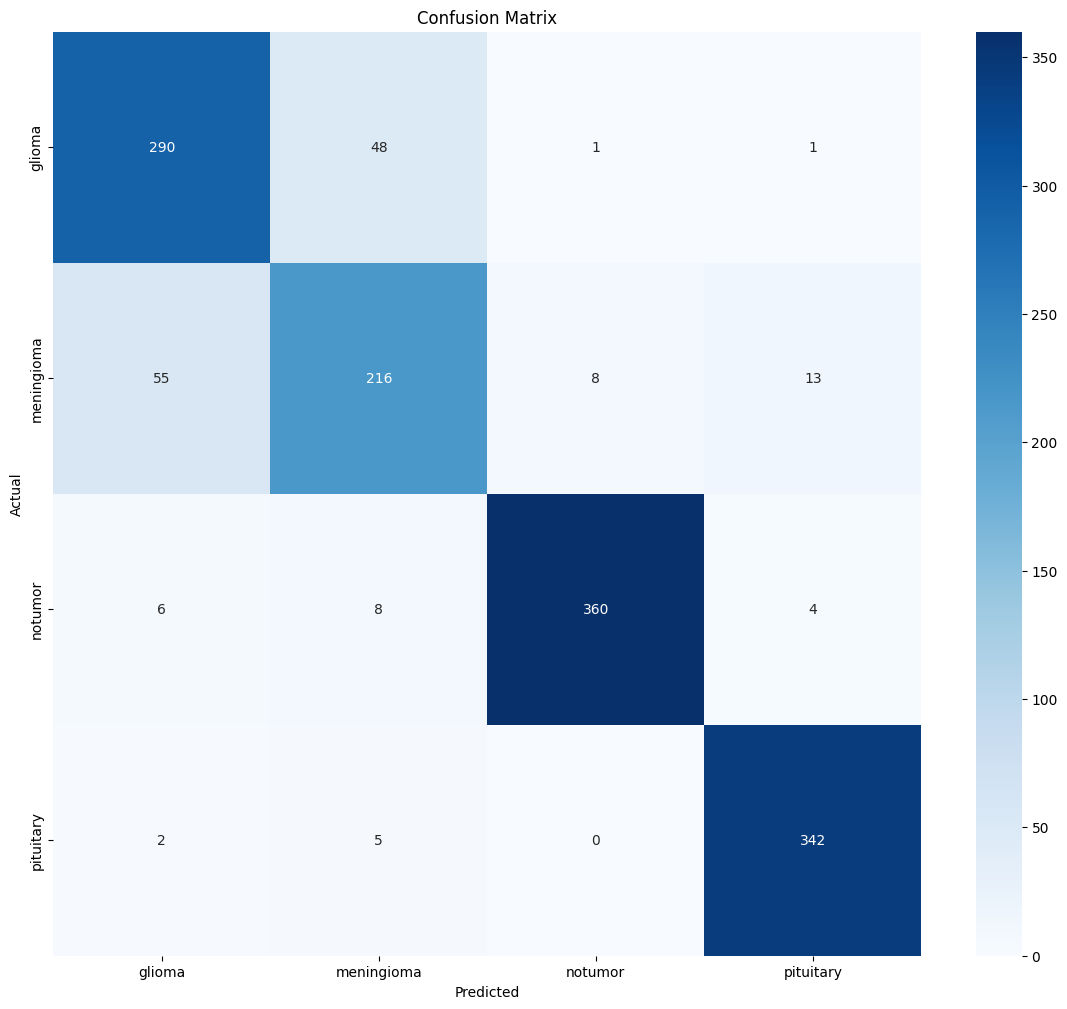

In [18]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## --------------------------------------------------

In [19]:
starting_time = time.time()   

# Train SVM classifier
svm_classifier = SVC(kernel='sigmoid') # should I use different kernel ??? such as linear, sigmoid, and radial basis
svm_classifier.fit(X_train_normalized, y_train)

# Evaluate SVM classifier
accuracy_Sigmoid = svm_classifier.score(X_test_normalized, y_test)
print("Accuracy of Sigmoid:", accuracy_Sigmoid)  

ending_time = time.time()    

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of Sigmoid: 0.13318616629874908
Total runtime of model: 67.02287418047587 Min.


In [20]:
# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test_normalized)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report for SVM_Sigmoid:")
print(report)

Classification Report for SVM_Sigmoid:
              precision    recall  f1-score   support

      glioma       0.08      0.11      0.09       340
  meningioma       1.00      0.00      0.01       292
     notumor       0.10      0.22      0.14       378
   pituitary       0.90      0.17      0.29       349

    accuracy                           0.13      1359
   macro avg       0.52      0.13      0.13      1359
weighted avg       0.49      0.13      0.14      1359



In [21]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix for SVM/Sigmoid:")
print(cm)

Confusion Matrix for SVM/Sigmoid:
[[ 38   0 302   0]
 [101   1 190   0]
 [289   0  82   7]
 [ 57   0 232  60]]


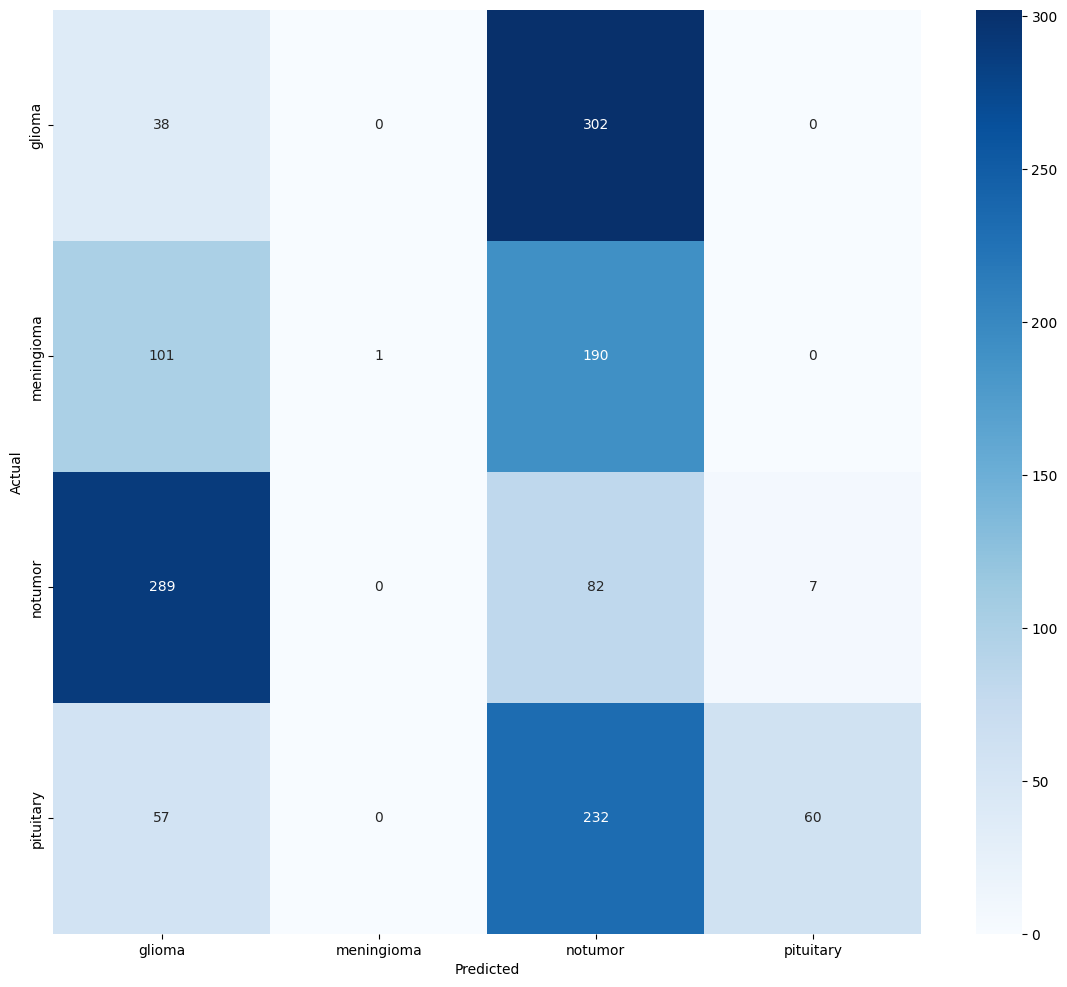

In [3]:
# Define class labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the confusion matrix data
confusion_matrix = np.array([[38, 0, 302, 0],
                              [101, 1, 190, 0],
                              [289, 0, 82, 7],
                              [57, 0, 232, 60]])

# Plot confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## --------------------------------------------------

In [23]:
starting_time = time.time()   
# Train SVM classifier
svm_classifier = SVC(kernel='rbf') 
svm_classifier.fit(X_train_normalized, y_train)

# Evaluate SVM classifier
accuracy_Rbf= svm_classifier.score(X_test_normalized, y_test)
print("Accuracy of Rbf:", accuracy_Rbf)   

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min") 

Accuracy of Rbf: 0.8903605592347315
Total runtime of model: 71.05638284683228 Min


In [24]:
# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test_normalized)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report for SVM_RBF:")
print(report)

Classification Report for SVM_RBF:
              precision    recall  f1-score   support

      glioma       0.86      0.86      0.86       340
  meningioma       0.80      0.75      0.77       292
     notumor       0.96      0.94      0.95       378
   pituitary       0.92      0.98      0.95       349

    accuracy                           0.89      1359
   macro avg       0.88      0.88      0.88      1359
weighted avg       0.89      0.89      0.89      1359



In [25]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix for SVM/Sigmoid:")
print(cm)

Confusion Matrix for SVM/Sigmoid:
[[294  46   0   0]
 [ 35 218  15  24]
 [  7   8 357   6]
 [  6   2   0 341]]


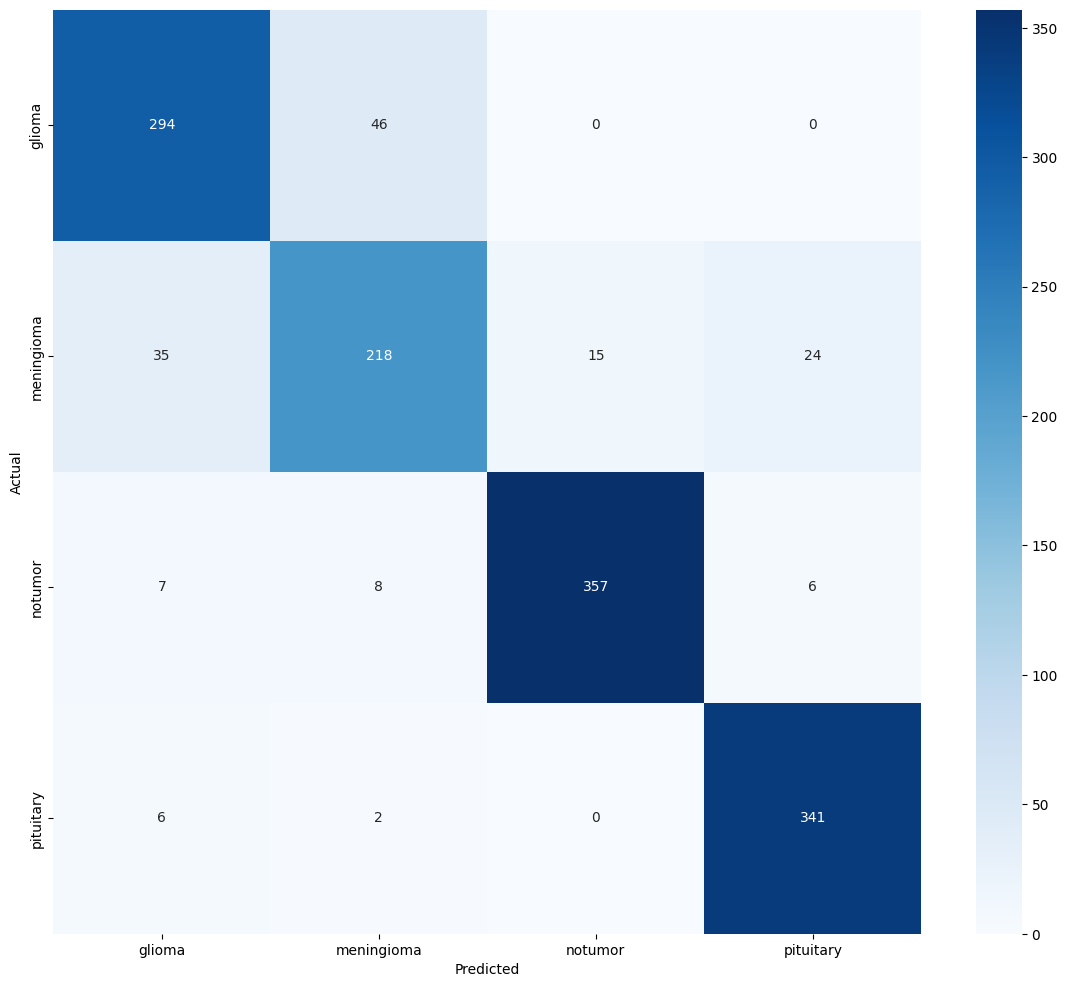

In [26]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## -------------------------------------------------------------

In [27]:
starting_time = time.time()   

random_forest_classifier = RandomForestClassifier(n_estimators=500, max_depth=500)  
random_forest_classifier.fit(X_train_normalized, y_train)

# Evaluate Random Forest classifier
accuracy_RF = random_forest_classifier.score(X_test_normalized, y_test)
print("Accuracy of RF:", accuracy_RF)   

ending_time = time.time()   

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of RF: 0.9271523178807947
Total runtime of model: 8.896905934810638 Min.


In [28]:
# Predict the labels for the test set
y_pred = random_forest_classifier.predict(X_test_normalized)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.98      0.86      0.92       340
  meningioma       0.85      0.86      0.85       292
     notumor       0.97      0.98      0.98       378
   pituitary       0.91      0.99      0.95       349

    accuracy                           0.93      1359
   macro avg       0.93      0.92      0.92      1359
weighted avg       0.93      0.93      0.93      1359



In [29]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix for SVM/Sigmoid:")
print(cm)

Confusion Matrix for SVM/Sigmoid:
[[293  42   0   5]
 [  6 250  11  25]
 [  0   2 371   5]
 [  1   1   1 346]]


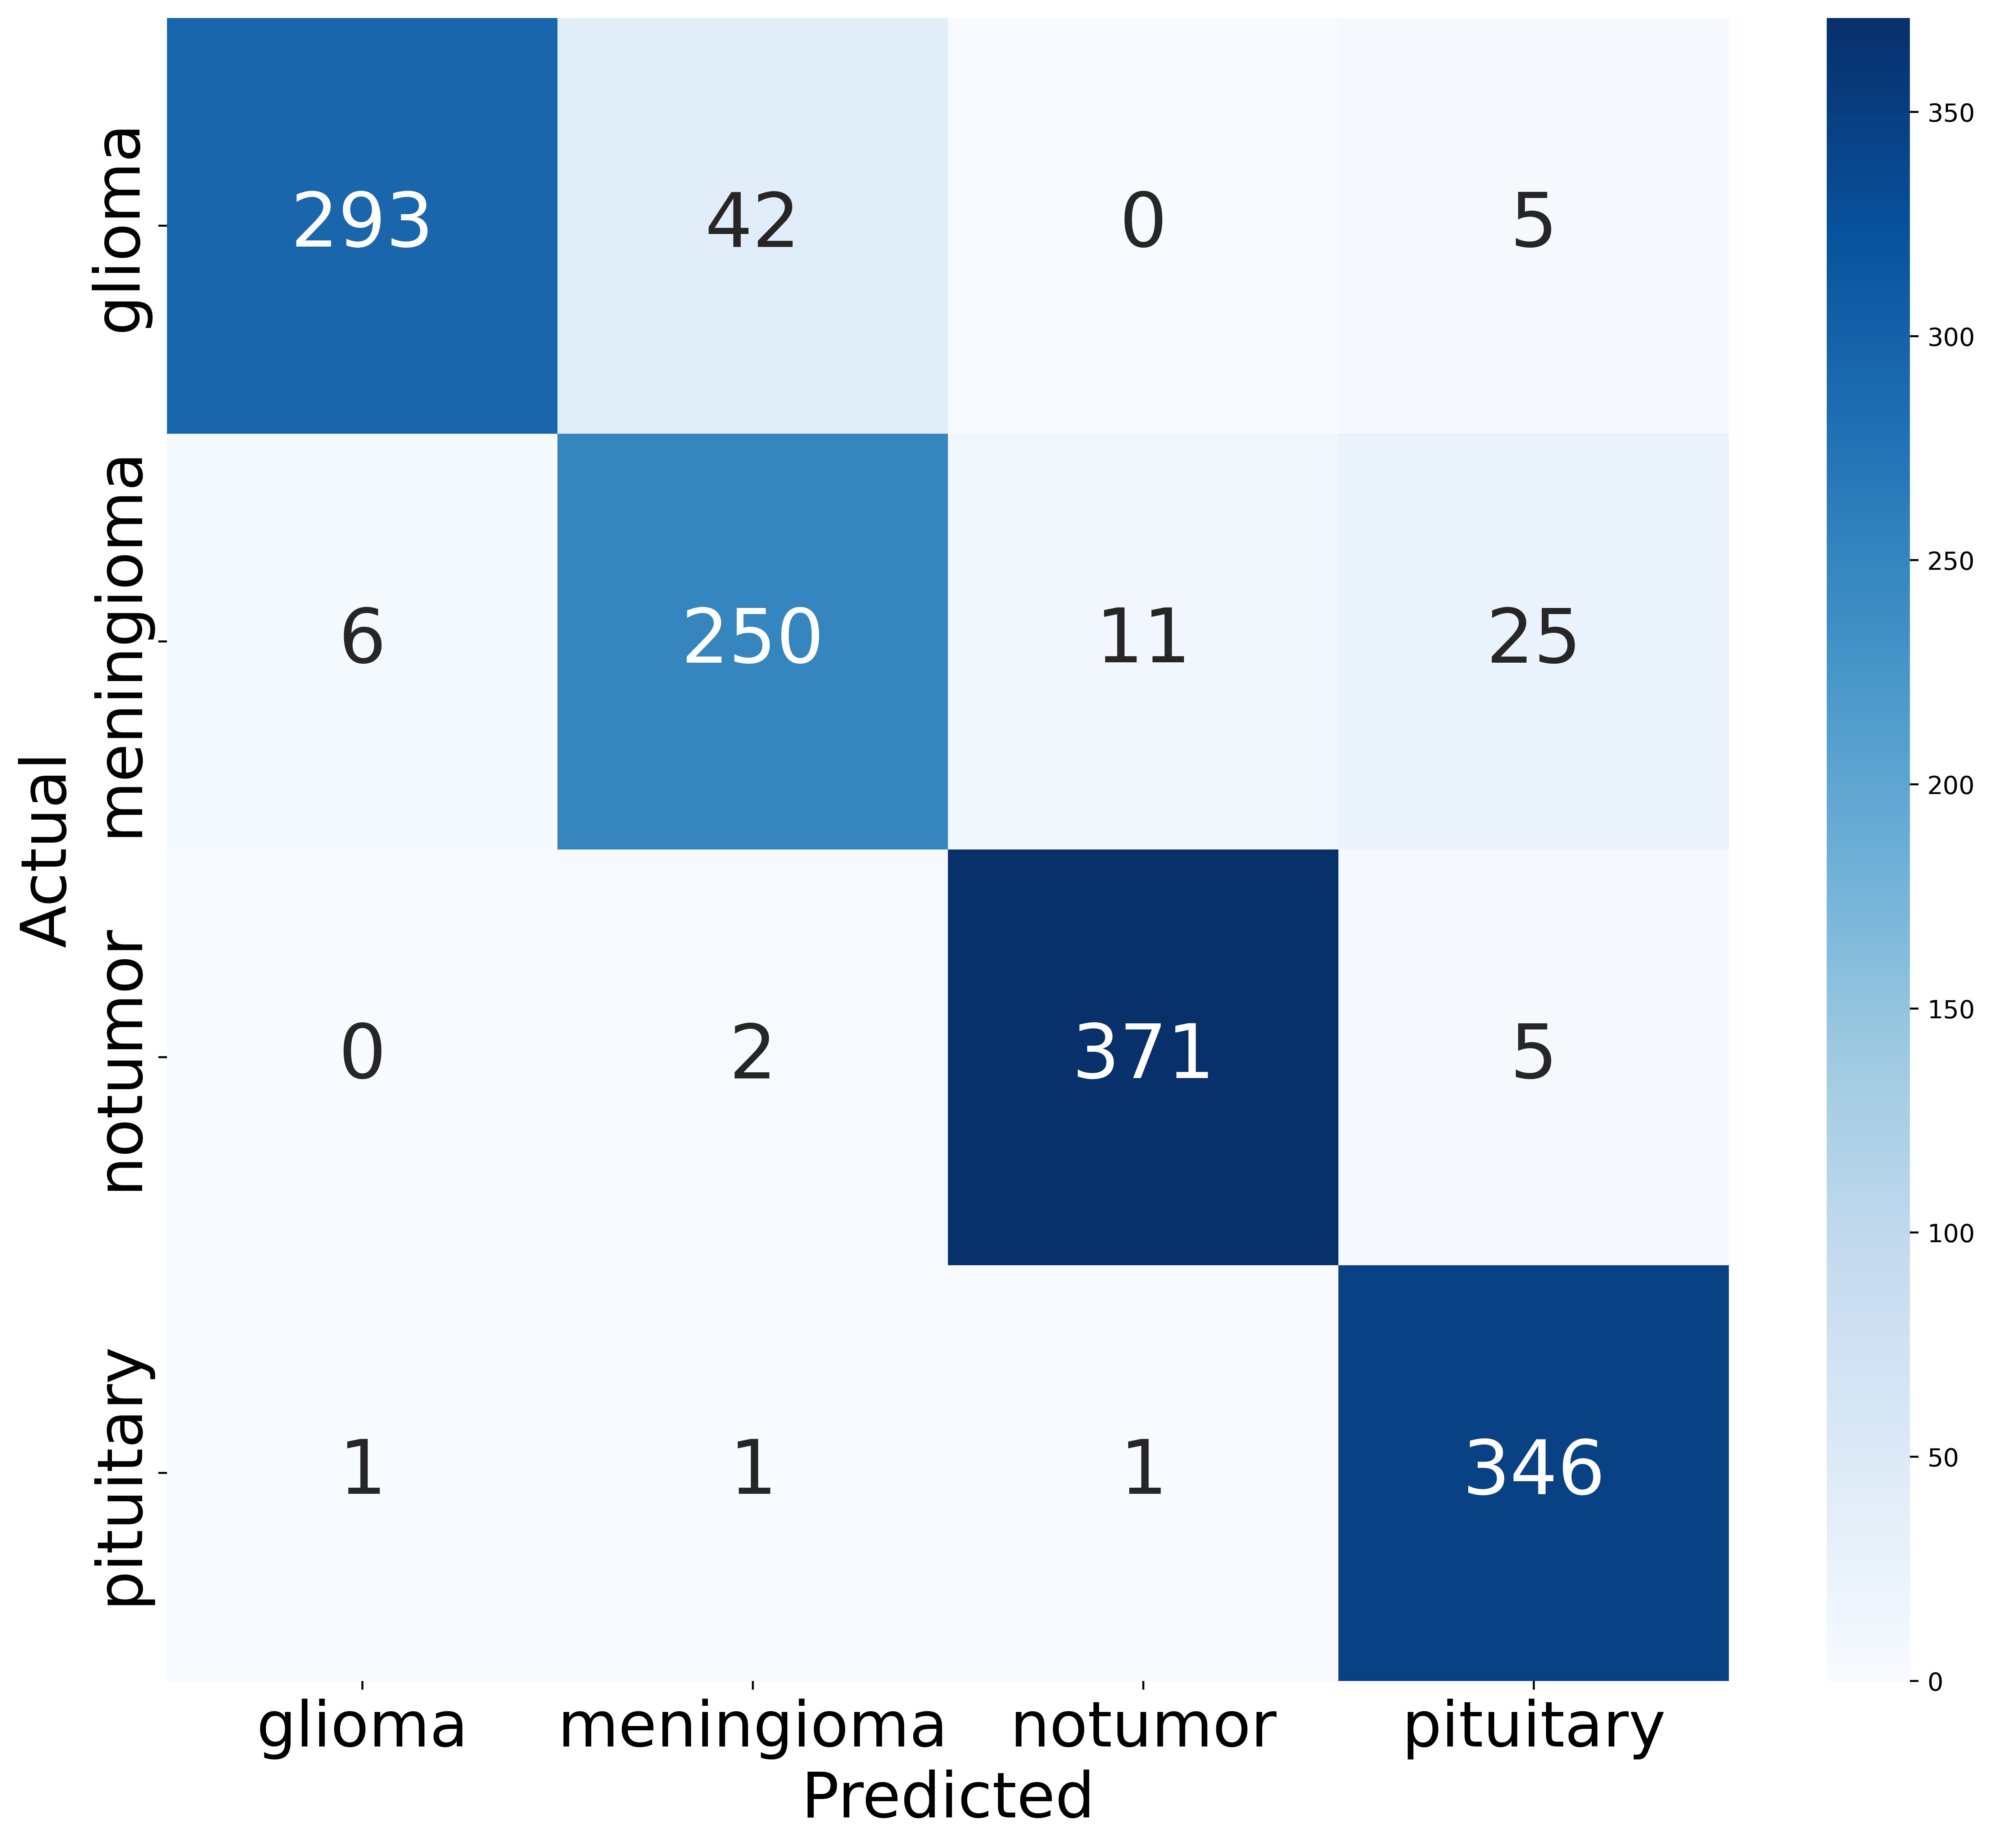

In [3]:
# Define class labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the confusion matrix data
confusion_matrix = np.array([[293,  42,   0,   5],
                            [  6, 250,  11,  25],
                            [  0,   2, 371,   5],
                            [  1,   1,   1, 346]])

# Plot confusion matrix
plt.figure(figsize=(14, 12), dpi=500)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=labels, yticklabels=labels, annot_kws={"size": 30})

# Increase label font size
plt.xticks(fontsize=25)
plt.yticks(fontsize=25) 
plt.xlabel('Predicted', fontsize = 25)
plt.ylabel('Actual', fontsize = 25)
plt.show()

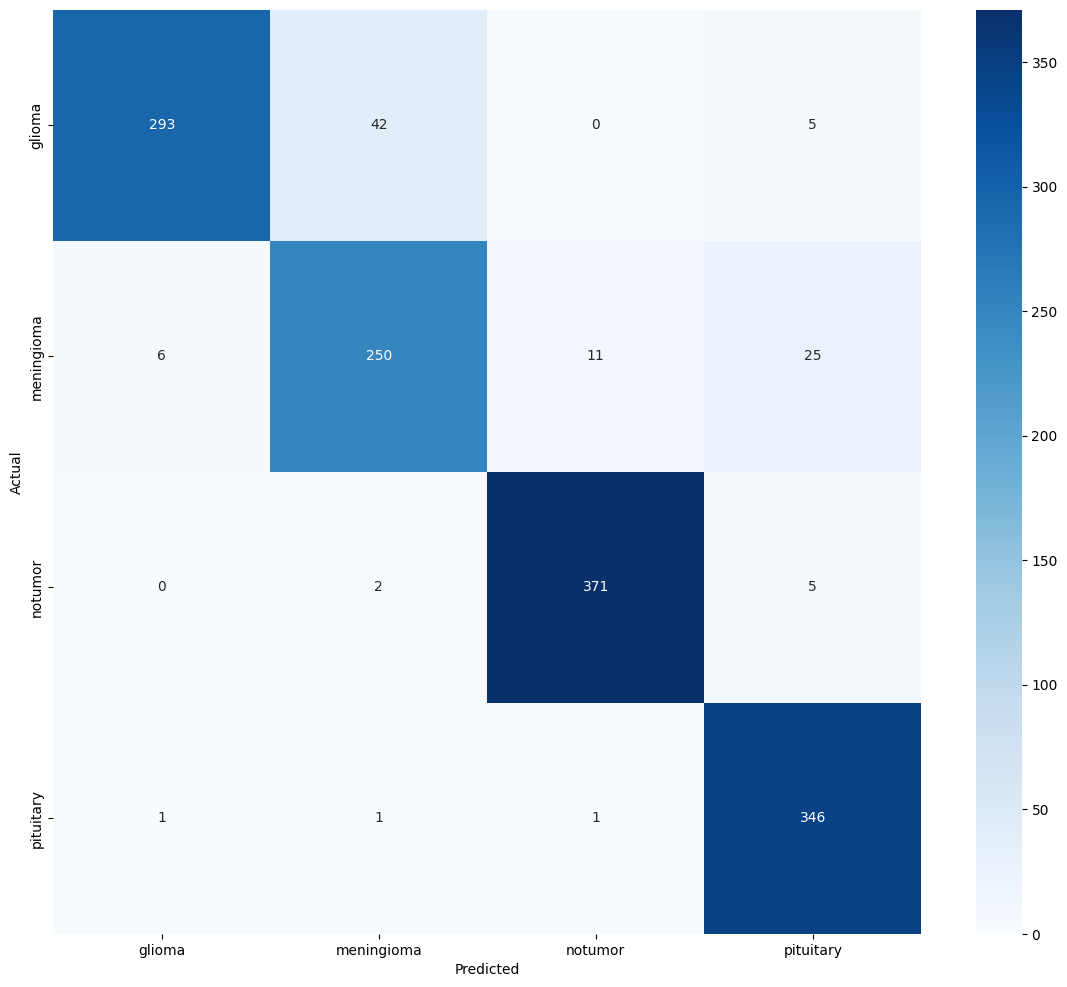

In [30]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## -------------------------------------------------------------------

In [31]:
starting_time = time.time()   

logistic_regression_classifier = LogisticRegression(multi_class="multinomial", max_iter=10000)  
logistic_regression_classifier.fit(X_train_normalized, y_train)   

#Evaluate LR classifier
accuracy_LR = logistic_regression_classifier.score(X_test_normalized, y_test)
print("Accuracy of LR:", accuracy_LR)  

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of LR: 0.8579838116261957
Total runtime of model: 1.657504181067149 Min.


In [32]:
# Predict the labels for the test set
y_pred = logistic_regression_classifier.predict(X_test_normalized)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.80      0.79      0.80       340
  meningioma       0.71      0.69      0.70       292
     notumor       0.95      0.96      0.95       378
   pituitary       0.93      0.96      0.94       349

    accuracy                           0.86      1359
   macro avg       0.85      0.85      0.85      1359
weighted avg       0.86      0.86      0.86      1359



In [33]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix for SVM/Sigmoid:")
print(cm)

Confusion Matrix for SVM/Sigmoid:
[[269  66   4   1]
 [ 57 201  15  19]
 [  5   7 362   4]
 [  4  10   1 334]]


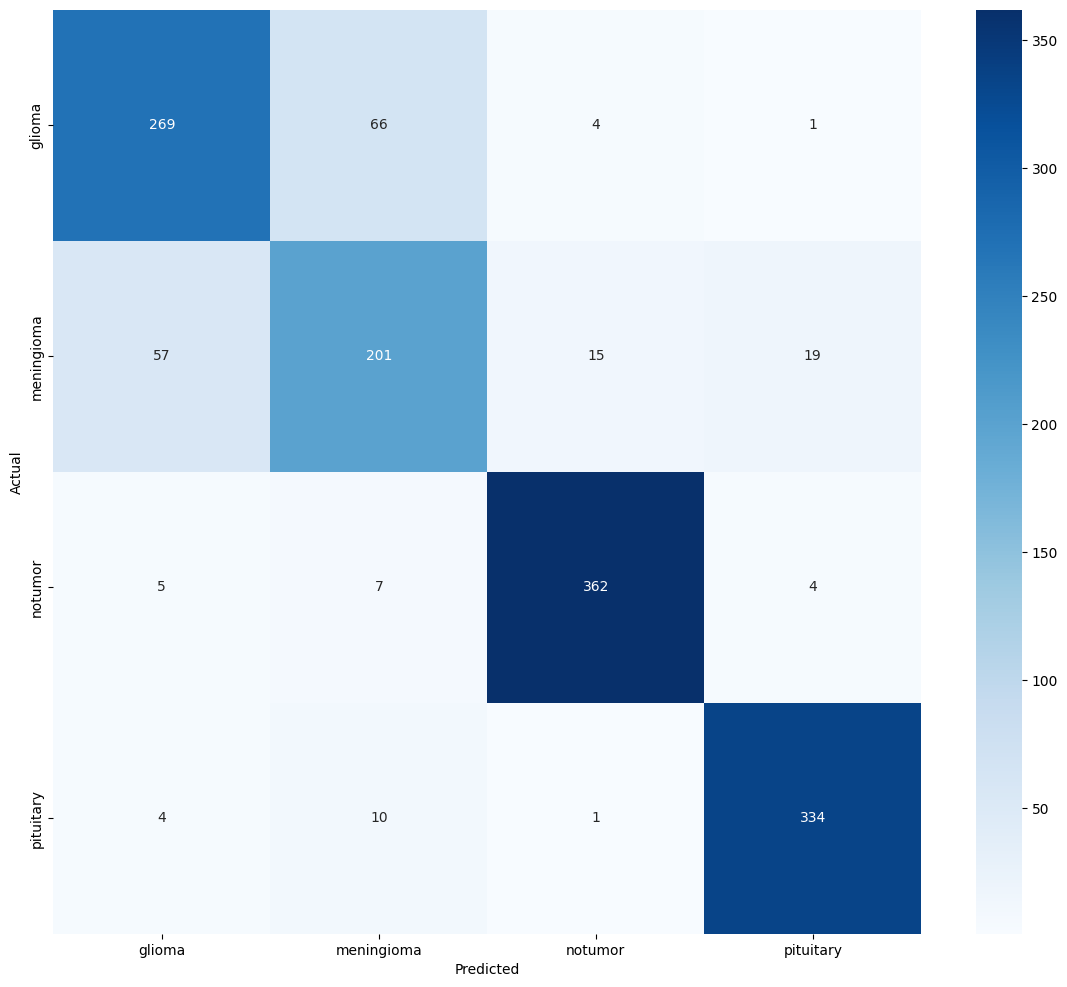

In [34]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## ------------------------------------------------------------

In [35]:
starting_time = time.time()   

knn_classifier = KNeighborsClassifier(n_neighbors=4)  
knn_classifier.fit(X_train_normalized, y_train)

# Evaluate KNN classifier
accuracy_KNN = knn_classifier.score(X_test_normalized, y_test)
print("Accuracy of KNN:", accuracy_KNN) 

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of KNN: 0.8734363502575423
Total runtime of model: 0.27921384970347085 Min.


In [36]:
# Predict the labels for the test set
y_pred = knn_classifier.predict(X_test_normalized)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.77      0.96      0.85       340
  meningioma       0.92      0.59      0.72       292
     notumor       0.93      0.91      0.92       378
   pituitary       0.91      0.99      0.95       349

    accuracy                           0.87      1359
   macro avg       0.88      0.86      0.86      1359
weighted avg       0.88      0.87      0.87      1359



In [37]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix for SVM/Sigmoid:")
print(cm)

Confusion Matrix for SVM/Sigmoid:
[[326   6   7   1]
 [ 84 173  18  17]
 [ 11   8 343  16]
 [  2   2   0 345]]


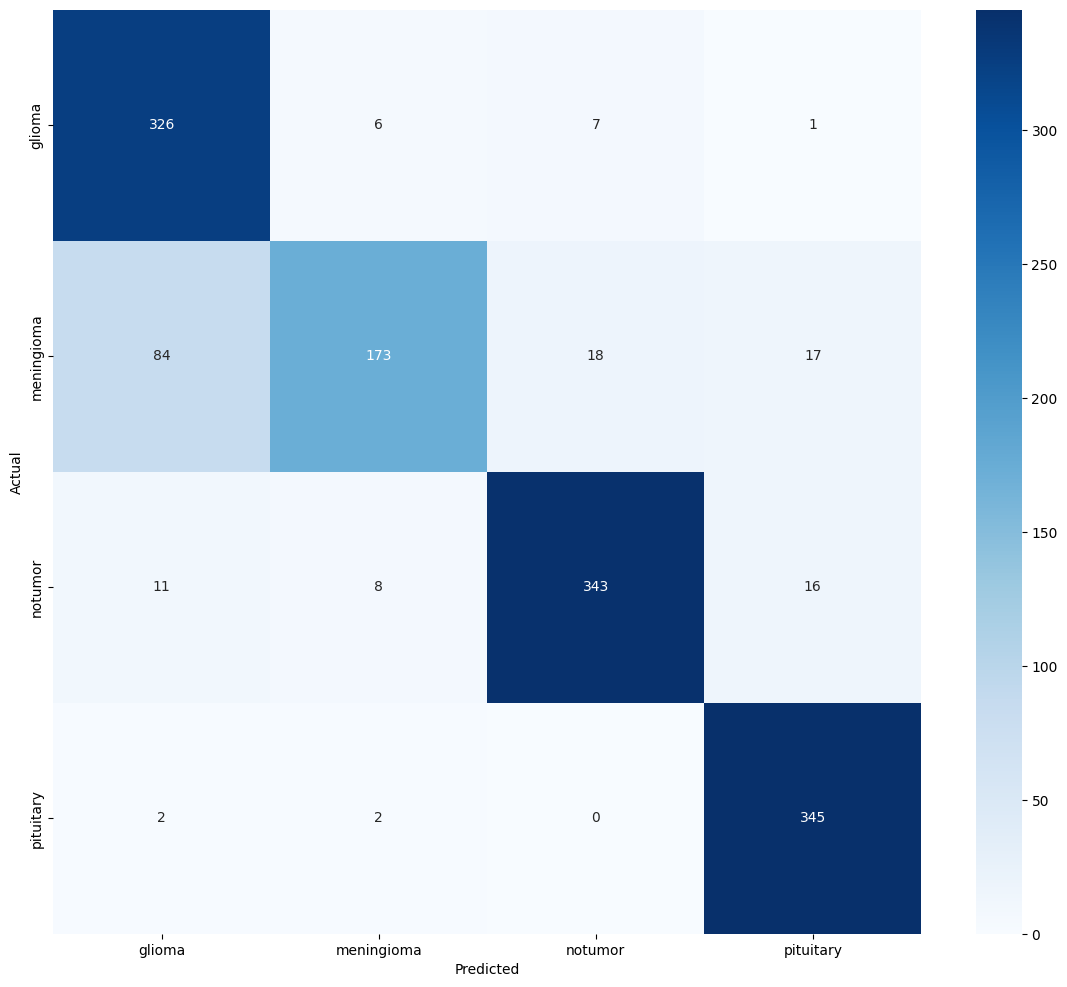

In [38]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()